# WCS Transformations

As we've seen in the FITS tutorial, FITS file headers often include information about the coordinate system of the data. This is referred to as World Coordinate System (WCS) information. The [astropy.wcs](http://docs.astropy.org/en/stable/wcs/index.html) sub-package wraps the standard [WCSLIB](https://www.atnf.csiro.au/people/mcalabre/WCS/) library and provides an easy way to convert from pixel to world coordinates and back.


<section class="objectives panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-certificate"></span> Objectives</h2>
</div>


<div class="panel-body">

<ul>
<li>Representing FITS WCS transformations</li>
<li>Converting between pixel and world coordinates (scalars and arrays)</li>
<li>Using high-level coordinate objects such as SkyCoord</li>
</ul>

</div>

</section>


## Documentation

This notebook only shows a subset of the functionality in astropy.wcs. For more information about the features presented below as well as other available features, you can read the
[astropy.wcs documentation](https://docs.astropy.org/en/stable/wcs/).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('image', origin='lower')
plt.rc('figure', figsize=(10, 6))

## Data

For this tutorial we will use the same FITS image that we used for the FITS tutorial, namely the [data/LMCDensFits1k.fits](data/LMCDensFits1k.fits) FITS file which was downloaded from http://www.sim.ul.pt/gaia/dr1/gallery/, and which contains the density of sources in the Gaia DR1 release towards the Large Magellanic Cloud (LMC), as well as the [data/gaia_lmc_psc.fits](data/gaia_lmc_psc.fits) file which contains the result of a table query in the GAIA archive.

## Representing WCS transformations

The World Coordinate System standard is often used in FITS files in order to describe the conversion from pixel to world (e.g. equatorial, galactic, etc.) coordinates. Given a FITS file with WCS information, such as [data/LMCDensFits1k.fits](data/LMCDensFits1k.fits), we can create an object to represent the WCS transformation either by directly supplying the filename:

In [2]:
from astropy.wcs import WCS
wcs = WCS('../data/LMCDensFits1k.fits')

import os.path
wcs = WCS(os.path.join('..','data','LMCDensFits1k.fits'))

or by passing a Header object:

In [3]:
from astropy.io import fits
hdulist = fits.open('../data/LMCDensFits1k.fits')
wcs = WCS(hdulist[0].header)

The result is an object representing the WCS transformation:

In [4]:
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'GLON-SIN'  'GLAT-SIN'  
CRVAL : 280.319239  -32.8378823  
CRPIX : 500.0  375.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.014  0.014  
NAXIS : 1000  750

## Pixel to World and World to Pixel transformations

Once the WCS object has been created, you can use the following methods to convert pixel to world coordinates:

In [5]:
wx, wy = wcs.wcs_pix2world(250., 100., 0)

In [6]:
print(wx, wy)

284.66588800296825 -36.604857691421486


This converts the pixel coordinates (250, 100) to the native world coordinate system of the transformation. Note the third argument, set to 0, which indicates whether the pixel coordinates should be treated as starting from (1, 1) (as FITS files do) or from (0, 0).

Converting from world to pixel coordinates is similar:

In [7]:
px, py = wcs.wcs_world2pix(285., -36., 0)

In [8]:
print(px, py)

228.81397242737341 142.26113022170344


## Working with arrays

You can pass arrays of coordinates to the above functions:

In [9]:
import numpy as np
px = np.linspace(200., 300., 10)
py = np.repeat(100., 10)
wx, wy = wcs.wcs_pix2world(px, py, 0)

In [10]:
print(wx)

[285.53877268 285.34479532 285.15081974 284.95684585 284.76287357
 284.56890281 284.37493348 284.18096552 283.98699883 283.79303335]


## Working with high-level coordinate objects

In the above examples, the world coordinates are represented as floating point values or arrays of floating point values. In practice, you may instead want to work with e.g. ``SkyCoord`` or ``Quantity`` objects. As of astropy v3.1, there are now methods to allow you to easily do this:

In [11]:
wcs.pixel_to_world(30, 40)

<SkyCoord (Galactic): (l, b) in deg
    (288.59789828, -37.26059622)>

In [12]:
wcs.pixel_to_world(px, py)

<SkyCoord (Galactic): (l, b) in deg
    [(285.53877268, -36.57306338), (285.34479532, -36.58063137),
     (285.15081974, -36.5879121 ), (284.95684585, -36.59490565),
     (284.76287357, -36.60161211), (284.56890281, -36.60803153),
     (284.37493348, -36.614164  ), (284.18096552, -36.62000959),
     (283.98699883, -36.62556836), (283.79303335, -36.63084037)]>

In [13]:
from astropy.coordinates import SkyCoord
px, py = wcs.world_to_pixel(SkyCoord.from_name('30 Dor'))
px, py

(array(550.91776949), array(457.06964436))

Note that in this interface, you don't need to specify the '0' or '1' value - all pixel coordinates are assumed to be zero-based.


<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Challenge</h2>
</div>


<div class="panel-body">

<p>Find the position of all the stars in the <a href="data/gaia_lmc_psc.fits">data/gaia_lmc_psc.fits</a> catalog in pixel coordinates, and overplot them on the image (you'll need to use things we have learned in previous tutorials).</p>

</div>

</section>


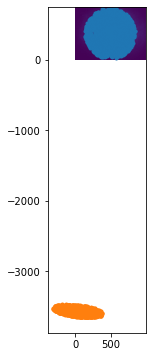

In [29]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord

hdulist = fits.open('../data/LMCDensFits1k.fits')
wcs = WCS(hdulist[0].header)

gaia_stars = fits.open('../data/gaia_lmc_psc.fits')
#wcs_gaia = Not available in the table, it has coordinate columns
#gaia_stars[1].data['ra']
#gaia_stars[1].data['dec']

coord = SkyCoord(gaia_stars[1].data['ra'],gaia_stars[1].data['dec'],unit='deg')

px, py = wcs.world_to_pixel(coord)

plt.imshow(hdulist[0].data)

plt.plot(px,py,'.')

x, y = wcs.wcs_world2pix(gaia_stars[1].data['ra'],gaia_stars[1].data['dec'],0)
plt.plot(x,y,'.')

<center><i>This notebook was originally written by <a href="https://aperiosoftware.com/">Aperio Software Ltd</a> and modified by Brigitta Sipőcz. &copy; 2019-2021 and is licensed under a <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License (CC BY 4.0)</a></i></center>

![cc](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by.svg)

In [20]:
gaia_stars.info()

Filename: ../data/gaia_lmc_psc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1                1 BinTableHDU     39   1226R x 14C   ['K', 'D', 'D', 'D', 'D', 'D', 'D', 'E', 'E', 'D', 'D', '13A', 'E', 'E']   


In [26]:
px,py

(array([352.53499684, 320.17077224, 324.09088298, ..., 475.51610259,
        475.8079697 , 488.69807763]),
 array([534.7267163 , 254.35061547, 248.4197497 , ..., 153.25349821,
        141.77167538, 141.4054696 ]))

In [21]:
gaia_stars[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                  101 / width of table in bytes                        
NAXIS2  =                 1226 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                   14 / number of columns                              
TTYPE1  = 'source_id'          / label for column 1                             
TFORM1  = 'K       '           / format for column 1                            
TTYPE2  = 'ra      '           / label for column 2                             
TFORM2  = 'D       '           / format for column 2                            
TTYPE3  = 'ra_error'        